In [1]:
#Importing useful libraries
import pandas as pd
#import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [2]:
#Importing and reading data.
data = pd.read_csv("student-mat.csv", sep=";")
# Since our data is seperated by semicolons we need to do sep=";"

In [3]:
# Displaying the first 6 rows of the data.
data.head(n=6)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15


In [4]:
#Gives the number of columns and rows in our data
data.shape



(395, 33)

In [5]:
data.values

array([['GP', 'F', 18, ..., 5, 6, 6],
       ['GP', 'F', 17, ..., 5, 5, 6],
       ['GP', 'F', 15, ..., 7, 8, 10],
       ...,
       ['MS', 'M', 21, ..., 10, 8, 7],
       ['MS', 'M', 18, ..., 11, 12, 10],
       ['MS', 'M', 19, ..., 8, 9, 9]], dtype=object)

In [6]:
#Summary statistics of the data. Gives summary statistics of the data in numeric form.
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
#Picking only a few columns of the data and saving the new data as data1

data1=data[["sex","age","G1","G2","G3"]]
data1.head()

,sex,age,G1,G2,G3
0,F,18,5,6,6
1,F,17,5,5,6
2,F,15,7,8,10
3,F,15,15,14,15
4,F,16,6,10,10


In [9]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [10]:
data.iloc[:,0:5]

,school,sex,age,address,famsize
0,GP,F,18,U,GT3
1,GP,F,17,U,GT3
2,GP,F,15,U,LE3
3,GP,F,15,U,GT3
4,GP,F,16,U,GT3
...,...,...,...,...,...
390,MS,M,20,U,LE3
391,MS,M,17,U,LE3
392,MS,M,21,R,GT3
393,MS,M,18,R,LE3


In [11]:
data.iloc[0:5,0:4]

,school,sex,age,address
0,GP,F,18,U
1,GP,F,17,U
2,GP,F,15,U
3,GP,F,15,U
4,GP,F,16,U


In [12]:
data.iloc[0:5,[6,14,21,30]]

,Medu,failures,internet,G1
0,4,0,no,5
1,1,0,yes,5
2,1,3,yes,7
3,4,0,yes,15
4,3,0,no,6


In [13]:
data.loc[0:5,["G1","age","G3"]]

,G1,age,G3
0,5,18,6
1,5,17,6
2,7,15,10
3,15,15,15
4,6,16,10
5,15,16,15


## DECISION TREE FOR CLASSIFICATION ##

In [14]:
import numpy as np
import pandas as pd
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

Age_male=[random.randint(5,80) for i in range(50000)]
Age_female=[random.randint(5,80) for i in range(50000)]
Gender_male=[1 for i in range(50000)]
Gender_female=[0 for i in range(50000)]
#Preference=[random.randint(1,3) for i in range(100000)]
Preference=[]
Age=Age_male+Age_female
Gender=Gender_male+Gender_female
for i in range(100000):
    if (Age[i]<=35 and Gender[i]==1):
        Preference.append('rhumba')
    elif (Age[i]<=35 and Gender[i]==0):
        Preference.append('bongo')
    else:
        Preference.append('reggae')


data=[[Age[i],Gender[i],Preference[i]] for i in range(len(Age))]
data=pd.DataFrame(data, columns=['Age','Gender','Preference'])
data.shape

print(data.head())
X=data.drop(columns='Preference')
y=data['Preference']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

predictions=model.predict(X_test)

score=accuracy_score(y_test,predictions)
print(' Accuracy score is '+ str(score))


   Age  Gender Preference
0   29       1     rhumba
1   26       1     rhumba
2   21       1     rhumba
3   40       1     reggae
4   76       1     reggae
 Accuracy score is 1.0


In [15]:
model.predict([[5,1]])

array(['rhumba'], dtype=object)

## Logistic regression for Classication ##

In [1]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
#logmodel.fit(X,y)
#predict=logmodel.predict([[60,1]])
logmodel.fit(X_train,y_train)
predict=logmodel.predict(X_test)
score=accuracy_score(y_test,predict)

#tree.export_graphviz(model,out_file='music_recommender1.dot',feature_names=['age','sex'],class_names=sorted(y.unique()),label='all',rounded=True,filled=True)

score

NameError: name 'X_train' is not defined

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict)

array([[ 4020,     0,     0],
       [    0, 11832,     0],
       [    0,     0,  4148]])

In [2]:
import pandas as pd
#Importing and reading data.
Iris= pd.read_csv("Iris.csv")
# Since our data is seperated by semicolons we need to do sep=";"
Iris=Iris.iloc[:,[1,2,3,4,5]]
Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X=Iris.drop(columns='Species')
y=Iris['Species']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

predictions=model.predict(X_test)

A=[[y_test],[predictions]]
score=accuracy_score(y_test,predictions)
score


NameError: name 'train_test_split' is not defined

In [4]:
logmodel=LogisticRegression()
#logmodel.fit(X,y)
#predict=logmodel.predict([[60,1]])
logmodel.fit(X_train,y_train)
predict=logmodel.predict(X_test)
score=accuracy_score(y_test,predict)

#tree.export_graphviz(model,out_file='music_recommender1.dot',feature_names=['age','sex'],class_names=sorted(y.unique()),label='all',rounded=True,filled=True)

score

NameError: name 'LogisticRegression' is not defined

In [5]:
Iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

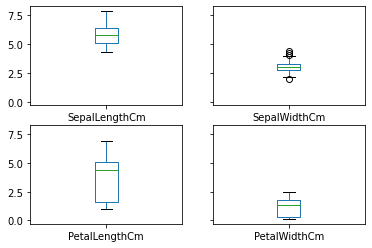

In [6]:
import matplotlib.pyplot as plt

Iris.plot(kind='box',subplots=True,layout=(2,2),sharex=True,sharey=True)
plt.show()

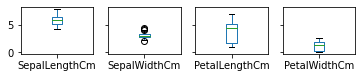

In [7]:
Iris.plot(kind='box',subplots=True,layout=(4,4),sharex=True,sharey=True)
plt.show()

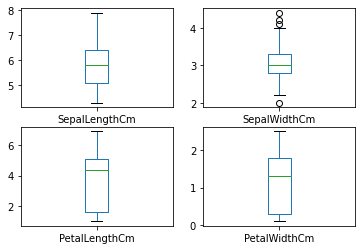

In [8]:
Iris.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

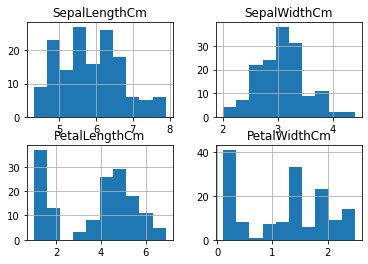

In [9]:
Iris.hist()
plt.show()

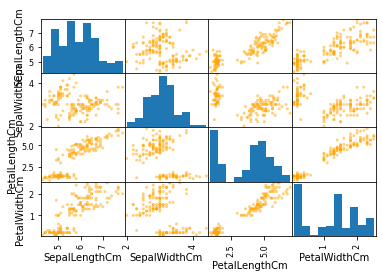

In [10]:
from pandas.plotting import scatter_matrix


scatter_matrix(Iris, color='orange')
plt.show()

In [11]:
Iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
group_iris=Iris.groupby('Species')


In [13]:
#for Species, Species_Iris in group_iris:
    #print(Species)
    #print(Species_Iris)
    

In [14]:
group_iris.mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [15]:
group_iris.std()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [16]:
group_iris.count()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [17]:
group_iris.max(),group_iris.min()

(                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 Species                                                                  
 Iris-setosa                5.8           4.4            1.9           0.6
 Iris-versicolor            7.0           3.4            5.1           1.8
 Iris-virginica             7.9           3.8            6.9           2.5,
                  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 Species                                                                  
 Iris-setosa                4.3           2.3            1.0           0.1
 Iris-versicolor            4.9           2.0            3.0           1.0
 Iris-virginica             4.9           2.2            4.5           1.4)

In [18]:
group_iris.get_group('Iris-setosa').head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
group_iris.get_group('Iris-setosa').describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


Species
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

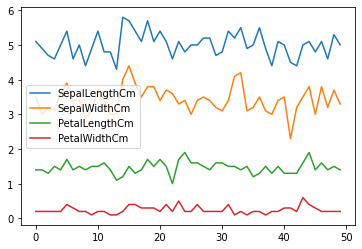

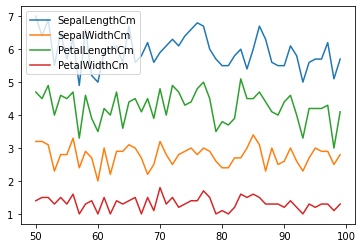

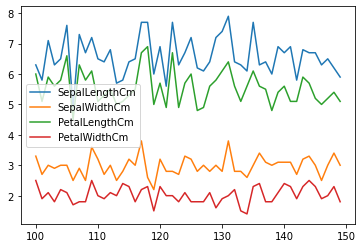

In [20]:
group_iris.plot()


## Data  ANALYSIS USING SEARBON LIBRARY ##

In [21]:
#Importing and reading data.
data = pd.read_csv("Titanic.csv", sep=";")
# Since our data is seperated by semicolons we need to do sep=";"

In [22]:
import numpy as np
import seaborn as sns

In [23]:
Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
Iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<AxesSubplot:xlabel='PetalWidthCm', ylabel='count'>

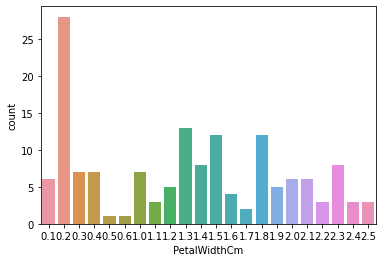

In [25]:
sns.countplot(x="PetalWidthCm", data=Iris)

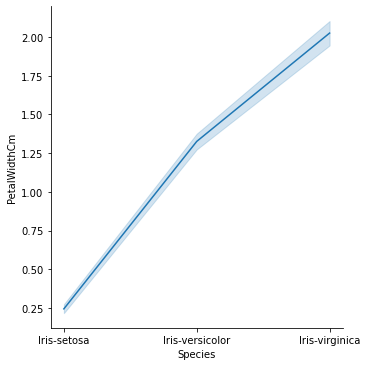

In [26]:
sns.relplot(x="Species", y="PetalWidthCm", data=Iris, kind="line")

## More on plotting ##

<function matplotlib.pyplot.show(close=None, block=None)>

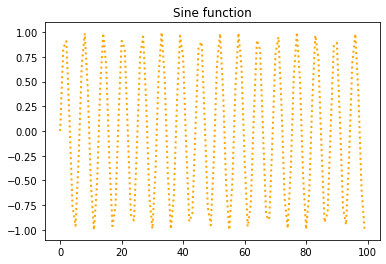

In [27]:
import math

X=[i for i in range(100)]
y1=[math.sin(X[i]) for i in range(100)]
plt.plot(X,y1,color='orange',linewidth=2,linestyle=':')
plt.title('Sine function')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

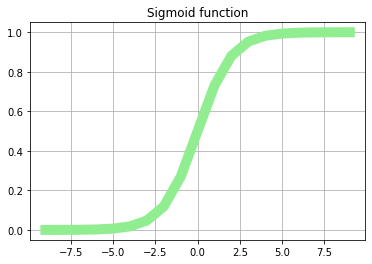

In [28]:
X1=[-i for i in range(10)]
X2=[i for i in range(10)]
X3=sorted(X1)+X2

y2=[1/(1+math.exp(-x)) for x in X3]
plt.plot(X3,y2,color='lightgreen',linewidth=10)
plt.title('Sigmoid function')
plt.grid(True)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

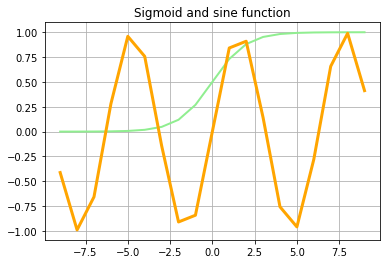

In [29]:
X1=[-i for i in range(10)]
X2=[i for i in range(10)]
X3=sorted(X1)+X2
y1=[math.sin(x) for x in X3]
y2=[1/(1+math.exp(-x)) for x in X3]
plt.plot(X3,y2,color='lightgreen',linewidth=2)
plt.plot(X3,y1,color='orange',linewidth=3)
plt.title('Sigmoid and sine function')
plt.grid(True)
plt.show

## Plotting Normal distribution ##

<function matplotlib.pyplot.show(close=None, block=None)>

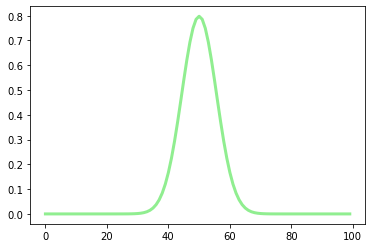

In [30]:
d_p=[i for i in range(100)] 
mu=50
delta=0.5

df=[(1/(delta*math.sqrt(2*math.pi)))*math.exp(-((d_p[i]-mu)/2*delta**2)**2) for i in range(100)]

plt.plot(d_p,df,color='lightgreen',linewidth=3)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

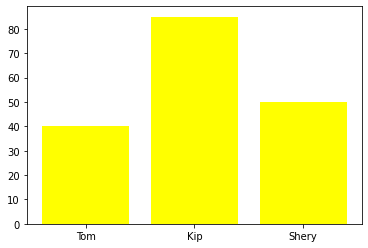

In [31]:
#Bar plot
Students={"Tom":40,"Kip":85,"Shery":50}
Names=list(Students.keys())
Marks=list(Students.values())
plt.bar(Names,Marks,color='yellow')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

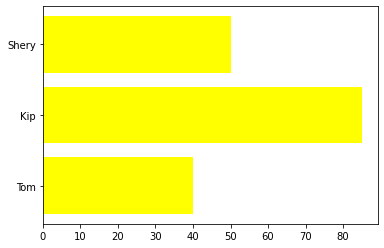

In [32]:
#Bar plot
Students={"Tom":40,"Kip":85,"Shery":50}
Names=list(Students.keys())
Marks=list(Students.values())
plt.barh(Names,Marks,color='yellow')
plt.show

## Scatter plot ##

<function matplotlib.pyplot.show(close=None, block=None)>

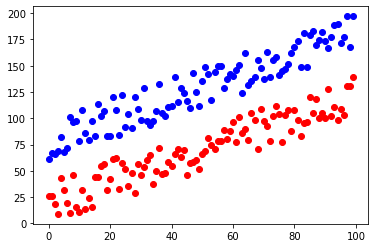

In [33]:
import random
def rand():
    rand=random.randint(1,40)
    return rand

x=[i for i in range(100)]
y=[i+rand() for i in range(len(x))]
Z=[60+i+rand() for i in range(len(x))]

plt.scatter(x,y,color='red')
plt.scatter(x,Z,color='Blue')
plt.show


## Classifying Iris Data using Random Forest  ##

In [34]:
# first neural network with keras tutorial
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [56]:
#Importing and reading data.
Iris= pd.read_csv("Iris.csv")
# Since our data is seperated by semicolons we need to do sep=";"
Iris=Iris.iloc[:,[1,2,3,4,5]]
Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
X=Iris.iloc[:,[1,2,3]]

y=Iris.iloc[:,4]
Xn=X+np.random.normal(0,10,X.shape)
Xn

,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,8.037819,-16.897404,0.570057
1,10.679024,7.298798,-3.438588
2,-4.856265,-9.883119,-1.110540
3,14.430799,-18.018041,-6.398917
4,-7.798025,9.249575,-5.343096
...,...,...,...
145,5.014799,10.607736,-15.880776
146,2.006759,7.390336,-8.103303
147,19.739857,6.815593,17.634047
148,-4.505230,-3.673001,4.542522


In [36]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

In [37]:
Iris['Is_train']=np.random.uniform(0,1,len(Iris))<=0.75
Iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Is_train
0,5.1,3.5,1.4,0.2,Iris-setosa,True
1,4.9,3.0,1.4,0.2,Iris-setosa,True
2,4.7,3.2,1.3,0.2,Iris-setosa,True
3,4.6,3.1,1.5,0.2,Iris-setosa,True
4,5.0,3.6,1.4,0.2,Iris-setosa,True


In [38]:
train,test=Iris[Iris['Is_train']==True],Iris[Iris['Is_train']==False]

In [39]:
len(train), len(test)

(118, 32)

In [40]:
X_train=train.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13]]
y_train=train.iloc[:,15]
X_test=test.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13]]
y_test=test.iloc[:,15]

X_train.head()

IndexError: positional indexers are out-of-bounds

In [63]:
y_train=pd.factorize(train['Species'])[0]
y_test=pd.factorize(test['Species'])[0]

y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
## Creating a model
model=RandomForestClassifier(n_jobs=2,random_state=0)
model.fit(X_train,y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [65]:
predictions=model.predict(X_test)
score=accuracy_score(y_test,predictions)
score

0.9375

In [66]:
pd.crosstab(test['Species'],predictions,rownames=['Actual Species'],colnames=['predicted Species'])

predicted Species,0,1,2
Actual Species,,,
Iris-setosa,13,0,0
Iris-versicolor,0,5,2
Iris-virginica,0,0,12


# Deep Learning ##

In [70]:
import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

In [71]:
train_in=[[1,1,1],[1,0,1],[0,1,1],[0,0,1]]
train_out=[[1],[0],[0],[0]]

In [72]:
# Defining weights of the model
w=tf.Variable(tf.random.normal([3,1], seed=12))

In [73]:
# Place holders
x=tf.placeholder(tf.float32,[None,3])
x=tf.placeholder(tf.float32,[None,1])


In [74]:
output=tf.nn.relu(tf.matmul(w,x))

In [75]:
#Loss Function
loss=tf.reduce_sum(tf.square(output-y))

In [76]:
# Optimizer
optimizer=tf.train.GradientDescentOptimizer(0.01)
train=optimizer.minimize(loss)


In [79]:
#Initizlizing my variables
init=tf.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)

## A simple deep learning Example ##

1. Load Data.

The first step is to define the functions and classes we intend to use in this tutorial.

We will use the NumPy library to load our dataset and we will use two classes from the Keras library to define our model.

The imports required are listed below.

In [80]:
# first neural network with keras tutorial
import random
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [81]:
Numb1=[random.randint(20,25) for i in range(1000)]
Numb2=[random.randint(45,50) for i in range(1000)]
Numb3=[random.randint(67,70) for i in range(1000)]
Numb4=[random.randint(0,1) for i in range(1000)]

In [82]:
import numpy as np

Numb=[[Numb1[i],Numb2[i],Numb3[i],Numb4[i]]  for i in range(1000)]
Mydata=np.array(Numb)

We can now load our dataset.

In this Keras tutorial, we are going to use the Pima Indians onset of diabetes dataset. This is a standard machine learning dataset from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

As such, it is a binary classification problem (onset of diabetes as 1 or not as 0). All of the input variables that describe each patient are numerical. This makes it easy to use directly with neural networks that expect numerical input and output values, and ideal for our first neural network in Keras.



In [83]:
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
#dataset =Mydata
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

2. Define Keras Model

Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to 8 for the 8 input variables.

How do we know the number of layers and their types?

This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation (I explain more about this here). Generally, you need a network large enough to capture the structure of the problem.

In this example, we will use a fully-connected network structure with three layers.

Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

We will use the rectified linear unit activation function referred to as ReLU on the first two layers and the Sigmoid function in the output layer.

It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

We can piece it all together by adding each layer:

The model expects rows of data with 8 variables (the input_dim=8 argument).

The first hidden layer has 12 nodes and uses the relu activation function.

The second hidden layer has 8 nodes and uses the relu activation function.

The output layer has one node and uses the sigmoid activation function.


In [84]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

3. Compile Keras Model.

Now that the model is defined, we can compile it.

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.

We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In this case, we will use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“. You can learn more about choosing loss functions based on your problem here:

How to Choose Loss Functions When Training Deep Learning Neural Networks
We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems. To learn more about the Adam version of stochastic gradient descent see the post:

Gentle Introduction to the Adam Optimization Algorithm for Deep Learning
Finally, because it is a classification problem, we will collect and report the classification accuracy, defined via the metrics argument.

In [85]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

4. Fit Keras Model.

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data.

We can train or fit our model on our loaded data by calling the fit() function on the model.

Training occurs over epochs and each epoch is split into batches.

Epoch: One pass through all of the rows in the training dataset.
Batch: One or more samples considered by the model within an epoch before weights are updated.
One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs. For more on the difference between epochs and batches, see the post:

What is the Difference Between a Batch and an Epoch in a Neural Network?
The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the epochs argument. We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the batch_size argument.

For this problem, we will run for a small number of epochs (150) and use a relatively small batch size of 10.

These configurations can be chosen experimentally by trial and error. We want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output classification. The model will always have some error, but the amount of error will level out after some point for a given model configuration. This is called model convergence.

In [86]:
# fit the keras model on the dataset
model=model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10)

Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 591us/sample - loss: 2.2004 - acc: 0.5486 - val_loss: 1.0577 - val_acc: 0.5433
Epoch 2/150
514/514 [==============================] - 0s 204us/sample - loss: 1.1585 - acc: 0.5759 - val_loss: 0.8943 - val_acc: 0.6693
Epoch 3/150
 10/514 [..............................] - ETA: 0s - loss: 2.9211 - acc: 0.2000

/opt/anaconda3/envs/Project/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


514/514 [==============================] - 0s 195us/sample - loss: 1.0649 - acc: 0.5895 - val_loss: 0.8646 - val_acc: 0.7087
Epoch 4/150
514/514 [==============================] - 0s 156us/sample - loss: 1.0220 - acc: 0.6051 - val_loss: 0.8051 - val_acc: 0.6811
Epoch 5/150
514/514 [==============================] - 0s 170us/sample - loss: 0.9155 - acc: 0.6265 - val_loss: 0.7440 - val_acc: 0.6496
Epoch 6/150
514/514 [==============================] - 0s 163us/sample - loss: 0.8771 - acc: 0.6245 - val_loss: 0.7406 - val_acc: 0.6220
Epoch 7/150
514/514 [==============================] - 0s 183us/sample - loss: 0.8228 - acc: 0.6245 - val_loss: 0.7125 - val_acc: 0.6417
Epoch 8/150
514/514 [==============================] - 0s 169us/sample - loss: 0.7930 - acc: 0.6304 - val_loss: 0.7044 - val_acc: 0.6299
Epoch 9/150
514/514 [==============================] - 0s 188us/sample - loss: 0.7408 - acc: 0.6420 - val_loss: 0.6954 - val_acc: 0.6496
Epoch 10/150
514/514 [==============================]

514/514 [==============================] - 0s 167us/sample - loss: 0.5233 - acc: 0.7529 - val_loss: 0.5869 - val_acc: 0.7008
Epoch 122/150
514/514 [==============================] - 0s 164us/sample - loss: 0.5360 - acc: 0.7471 - val_loss: 0.5542 - val_acc: 0.7480
Epoch 123/150
514/514 [==============================] - 0s 146us/sample - loss: 0.5484 - acc: 0.7510 - val_loss: 0.6051 - val_acc: 0.6850
Epoch 124/150
514/514 [==============================] - 0s 161us/sample - loss: 0.5383 - acc: 0.7335 - val_loss: 0.5649 - val_acc: 0.7283
Epoch 125/150
514/514 [==============================] - 0s 192us/sample - loss: 0.5255 - acc: 0.7451 - val_loss: 0.5572 - val_acc: 0.7402
Epoch 126/150
514/514 [==============================] - 0s 192us/sample - loss: 0.5225 - acc: 0.7588 - val_loss: 0.5616 - val_acc: 0.7323
Epoch 127/150
514/514 [==============================] - 0s 156us/sample - loss: 0.5435 - acc: 0.7296 - val_loss: 0.7726 - val_acc: 0.5354
Epoch 128/150
514/514 [==================

## Second example using Iris Data ##

First we need to convert the species column in binary form. Next we retrieve the data as a list and convert back as an array

In [75]:
import pandas as pd
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

#Importing and reading data.
Iris= pd.read_csv("Iris.csv")
# Since our data is seperated by semicolons we need to do sep=";"
Iris=Iris.iloc[:,[1,2,3,4,5]]

Iris_list=Iris.values.tolist()
for i in range(50):
    for j in range(50,100):
        Iris_list[i][4]=1
        Iris_list[j][4]=0
        
Iris_list1=[Iris_list[i] for i in range(40)]
Iris_list2=[Iris_list[i] for i in range(50,90)]
Iris_list3=Iris_list1+Iris_list2

Iris_list4=[Iris_list[i] for i in range(40,50)]
Iris_list5=[Iris_list[i] for i in range(90,100)]
Iris_list6=Iris_list4+Iris_list5


In [76]:
train=np.array(Iris_list3)
train=train+np.random.normal(0,10,train.shape)
test=np.array(Iris_list6)
test=test+np.random.normal(0,10,test.shape)
# load the dataset
dataset =train
X_train= dataset[:,0:4]
y_train= dataset[:,4]
X_test=test[:,0:4]
y_test=test[:,4]

In [77]:
# define the keras model
model = Sequential()
model.add(Dense(30, input_dim=4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [78]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [79]:
# fit the keras model on the dataset
model=model.fit(X_train, y_train,validation_split=0.33, epochs=100, batch_size=10)


Epoch 1/100
6/6 [==============================] - 1s 46ms/step - loss: 5.5296 - accuracy: 0.0000e+00 - val_loss: -22.5639 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 9.4528 - accuracy: 0.0000e+00 - val_loss: -22.0321 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.4527 - accuracy: 0.0000e+00 - val_loss: -21.7011 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: -3.2205 - accuracy: 0.0000e+00 - val_loss: -21.3742 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 1.2213 - accuracy: 0.0000e+00 - val_loss: -20.9858 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: -5.4259 - accuracy: 0.0000e+00 - val_loss: -20.9449 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: -1.5994 - accuracy: 0.0000e

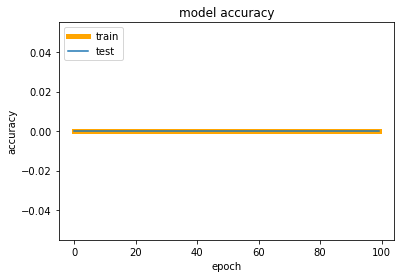

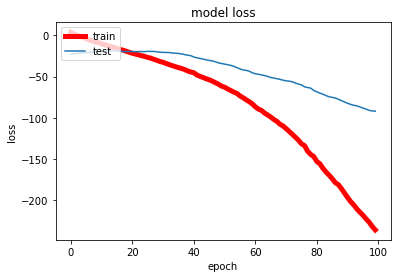

In [80]:
loss=list(model.history.values())[0]
accuracy=list(model.history.values())[1]
val_loss=list(model.history.values())[2]
val_accuracy=list(model.history.values())[3]

# summarize history for accuracy
plt.plot(accuracy,color='orange', linewidth=5)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss, color='red', linewidth=5)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [95]:
#predictions=model.predict(X_test)
#pred=[round(sum(predictions[i])) for i in range(len(predictions))]
#score=accuracy_score(y_test,pred)

#tree.export_graphviz(model,out_file='music_recommender1.dot',feature_names=['age','sex'],class_names=sorted(y.unique()),label='all',rounded=True,filled=True)

#score

## Image Classification Using Deep Learning, MNIST DATASET ##

Import the required python libraries for Image Classification


In [2]:
#install required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

In [3]:
#read mnist fashion dataset
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [8]:
#reshape data from 3-D to 2-D array
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
#feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
#fit and transform training dataset
X_train = minmax.fit_transform(X_train)
X_train=X_train/255
#transform testing dataset
X_test = minmax.transform(X_test)
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


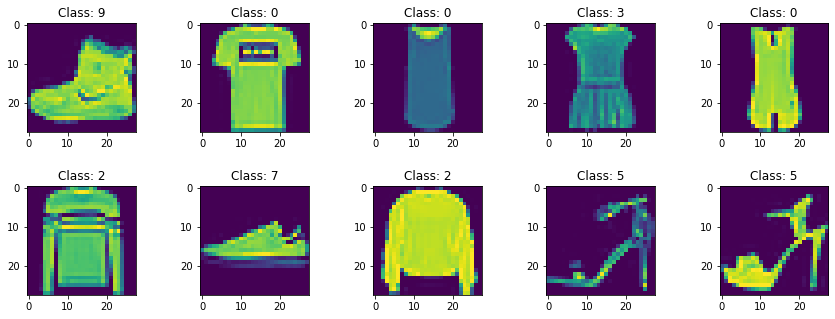

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

In [100]:
#initializing CNN model
classifier_e25 = Sequential()
#add 1st hidden layer
classifier_e25.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
#add output layer
classifier_e25.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
#compile the neural network
classifier_e25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
classifier_e25.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [101]:
#fit training dataset into the model
model= classifier_e25.fit(X_train, y_train, validation_split=0.33, epochs=25, batch_size=10)



Train on 40199 samples, validate on 19801 samples
Epoch 1/25
40130/40199 [============================>.] - ETA: 0s - loss: 0.5094 - acc: 0.8178

/opt/anaconda3/envs/Project/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


40199/40199 [==============================] - 12s 297us/sample - loss: 0.5091 - acc: 0.8179 - val_loss: 0.4233 - val_acc: 0.8508
Epoch 2/25
40199/40199 [==============================] - 11s 283us/sample - loss: 0.3782 - acc: 0.8612 - val_loss: 0.3847 - val_acc: 0.8650
Epoch 3/25
40199/40199 [==============================] - 11s 283us/sample - loss: 0.3391 - acc: 0.8753 - val_loss: 0.3732 - val_acc: 0.8645
Epoch 4/25
40199/40199 [==============================] - 13s 333us/sample - loss: 0.3178 - acc: 0.8824 - val_loss: 0.3771 - val_acc: 0.8671
Epoch 5/25
40199/40199 [==============================] - 14s 353us/sample - loss: 0.2944 - acc: 0.8911 - val_loss: 0.3385 - val_acc: 0.8760
Epoch 6/25
40199/40199 [==============================] - 15s 362us/sample - loss: 0.2818 - acc: 0.8945 - val_loss: 0.4338 - val_acc: 0.8533
Epoch 7/25
40199/40199 [==============================] - 14s 342us/sample - loss: 0.2677 - acc: 0.8992 - val_loss: 0.3272 - val_acc: 0.8861
Epoch 8/25
40199/40199 [

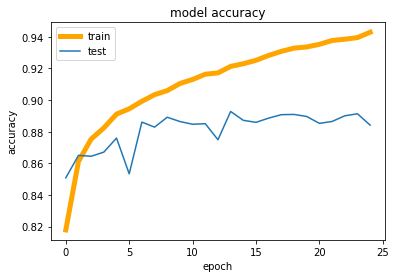

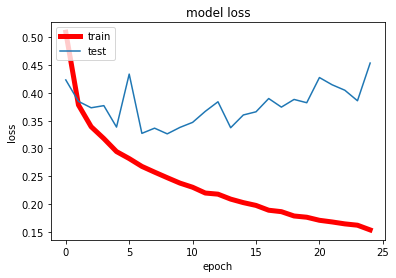

In [102]:
loss=list(model.history.values())[0]
accuracy=list(model.history.values())[1]
val_loss=list(model.history.values())[2]
val_accuracy=list(model.history.values())[3]

# summarize history for accuracy
plt.plot(accuracy,color='orange', linewidth=5)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss, color='red', linewidth=5)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [141]:
#evaluate the model for testing dataset
test_loss_e25 = classifier_e25.evaluate(X_test, y_test, verbose=0)
#calculate evaluation parameters
f1_e25 = f1_score(y_test, classifier_e25.predict_classes(X_test), average='micro')
roc_e25 = roc_auc_score(y_test, classifier_e25.predict_proba(X_test), multi_class='ovo')
#create evaluation dataframe
stats_e25 = pd.DataFrame({'Test accuracy' :  round(test_loss_e25[1]*100,3),
                      'F1 score'      : round(f1_e25,3),
                      'ROC AUC score' : round(roc_e25,3),
                      'Total Loss'    : round(test_loss_e25[0],3)}, index=[0])
#print evaluation dataframe
display(stats_e25)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.


,Test accuracy,F1 score,ROC AUC score,Total Loss
0,86.94,0.869,0.989,0.543


## Character Classification Using Deep Learning, MNIST DATASET ##

In [142]:
#install required libraries
import pandas as pd
import numpy as np
#data visualization packages
import matplotlib.pyplot as plt
#keras packages
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

#read mnist fashion dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
y_train

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

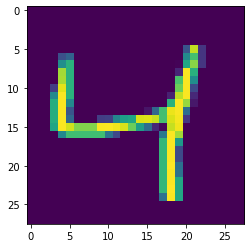

In [143]:
plt.imshow(X_train[2])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

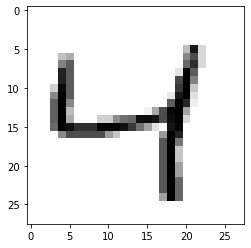

In [144]:
plt.imshow(X_train[2],cmap=plt.cm.binary)
plt.show

In [145]:
#reshape data from 3-D to 2-D array
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
#feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
#fit and transform training dataset
X_train = minmax.fit_transform(X_train)
#transform testing dataset
X_test = minmax.transform(X_test)
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


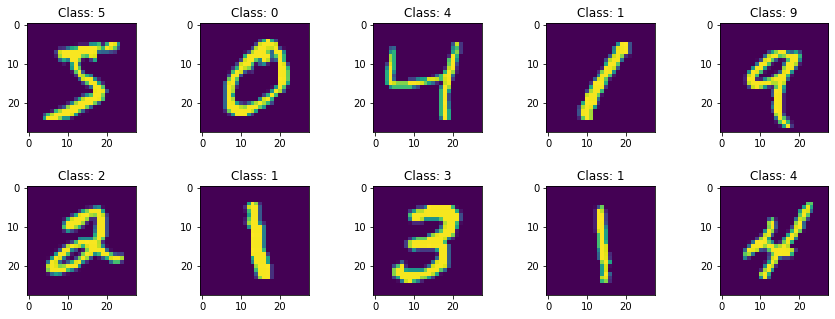

In [146]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

In [147]:
#initializing CNN model
classifier_e25 = Sequential()
#add 1st hidden layer
classifier_e25.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
#add output layer
classifier_e25.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
#compile the neural network
classifier_e25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
classifier_e25.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [148]:
model= classifier_e25.fit(X_train, y_train, validation_split=0.33, epochs=25, batch_size=10)

Train on 40199 samples, validate on 19801 samples
Epoch 1/25
40199/40199 [==============================] - 9s 215us/sample - loss: 0.2471 - acc: 0.9270 - val_loss: 0.1409 - val_acc: 0.9575
Epoch 2/25
40199/40199 [==============================] - 8s 205us/sample - loss: 0.0984 - acc: 0.9699 - val_loss: 0.1034 - val_acc: 0.9677
Epoch 3/25
40199/40199 [==============================] - 9s 224us/sample - loss: 0.0644 - acc: 0.9798 - val_loss: 0.1108 - val_acc: 0.9679
Epoch 4/25
40199/40199 [==============================] - 9s 217us/sample - loss: 0.0467 - acc: 0.9852 - val_loss: 0.1052 - val_acc: 0.9705
Epoch 5/25
40199/40199 [==============================] - 9s 215us/sample - loss: 0.0334 - acc: 0.9892 - val_loss: 0.1133 - val_acc: 0.9719
Epoch 6/25
40199/40199 [==============================] - 9s 213us/sample - loss: 0.0267 - acc: 0.9907 - val_loss: 0.1185 - val_acc: 0.9727
Epoch 7/25
40199/40199 [==============================] - 9s 212us/sample - loss: 0.0222 - acc: 0.9921 - val_l

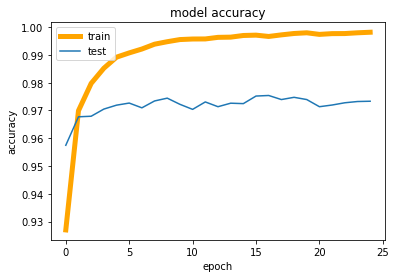

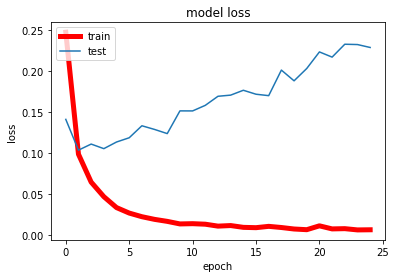

In [149]:
#model= classifier_e25.fit(X_train, y_train, validation_split=0.33, epochs=10, batch_size=10)

loss=list(model.history.values())[0]
accuracy=list(model.history.values())[1]
val_loss=list(model.history.values())[2]
val_accuracy=list(model.history.values())[3]

# summarize history for accuracy
plt.plot(accuracy,color='orange', linewidth=5)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss, color='red', linewidth=5)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Air Quality Prediction Using Machine Learning ##

In [150]:
import pandas as pd
import numpy  as np

In [151]:
import warnings
warnings.filterwarnings("ignore")

In [152]:
airdata=pd.read_csv('station_day.csv')
airdata

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,2020-06-27,8.65,16.46,NaN,NaN,NaN,NaN,0.69,4.36,30.59,1.32,7.26,NaN,50.0,Good
108031,WB013,2020-06-28,11.80,18.47,NaN,NaN,NaN,NaN,0.68,3.49,38.95,1.42,7.92,NaN,65.0,Satisfactory
108032,WB013,2020-06-29,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,NaN,63.0,Satisfactory
108033,WB013,2020-06-30,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,NaN,57.0,Satisfactory


In [153]:
airdata.shape


(108035, 16)

Notice from the description of the data below, Each column has alot of missing data

In [154]:
airdata.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,86410.000000,65329.000000,90929.000000,91488.000000,92535.000000,59930.000000,95037.000000,82831.000000,82467.000000,76580.000000,69333.000000,22898.000000,87025.000000
mean,80.272571,157.968427,23.123424,35.240760,41.195055,28.732875,1.605749,12.257634,38.134836,3.358029,15.345394,2.423446,179.749290
std,76.526403,123.418672,34.491019,29.510827,45.145976,24.897797,4.369578,12.984723,39.128004,11.156234,29.348587,6.472409,131.324339
min,0.020000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,31.880000,70.150000,4.840000,15.090000,13.970000,11.900000,0.530000,5.040000,18.895000,0.160000,0.690000,0.000000,86.000000
50%,55.950000,122.090000,10.290000,27.210000,26.660000,23.590000,0.910000,8.950000,30.840000,1.210000,4.330000,0.400000,132.000000
75%,99.920000,208.670000,24.980000,46.930000,50.500000,38.137500,1.450000,14.920000,47.140000,3.610000,17.510000,2.110000,254.000000
max,1000.000000,1000.000000,470.000000,448.050000,467.630000,418.900000,175.810000,195.650000,963.000000,455.030000,454.850000,170.370000,2049.000000


Now have created a new data set, by deleting rows with missing values.

In [155]:
data = airdata.dropna(axis = 0, how ='any')  
data.shape 

(10314, 16)

In [156]:
data.columns

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10314 entries, 1 to 106147
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StationId   10314 non-null  object 
 1   Date        10314 non-null  object 
 2   PM2.5       10314 non-null  float64
 3   PM10        10314 non-null  float64
 4   NO          10314 non-null  float64
 5   NO2         10314 non-null  float64
 6   NOx         10314 non-null  float64
 7   NH3         10314 non-null  float64
 8   CO          10314 non-null  float64
 9   SO2         10314 non-null  float64
 10  O3          10314 non-null  float64
 11  Benzene     10314 non-null  float64
 12  Toluene     10314 non-null  float64
 13  Xylene      10314 non-null  float64
 14  AQI         10314 non-null  float64
 15  AQI_Bucket  10314 non-null  object 
dtypes: float64(13), object(3)
memory usage: 1.3+ MB


In [158]:
data.AQI_Bucket.unique()

array(['Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good', 'Severe'],
      dtype=object)

In [159]:
print(data.NO2.min())
print(data.NO2.max())

0.01
254.78


In [160]:
pd.Categorical(data['AQI_Bucket']).describe()

,counts,freqs
categories,,
Good,1073,0.104033
Moderate,4402,0.426799
Poor,610,0.059143
Satisfactory,3730,0.361644
Severe,100,0.009696
Very Poor,399,0.038685


In [161]:
data.columns

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

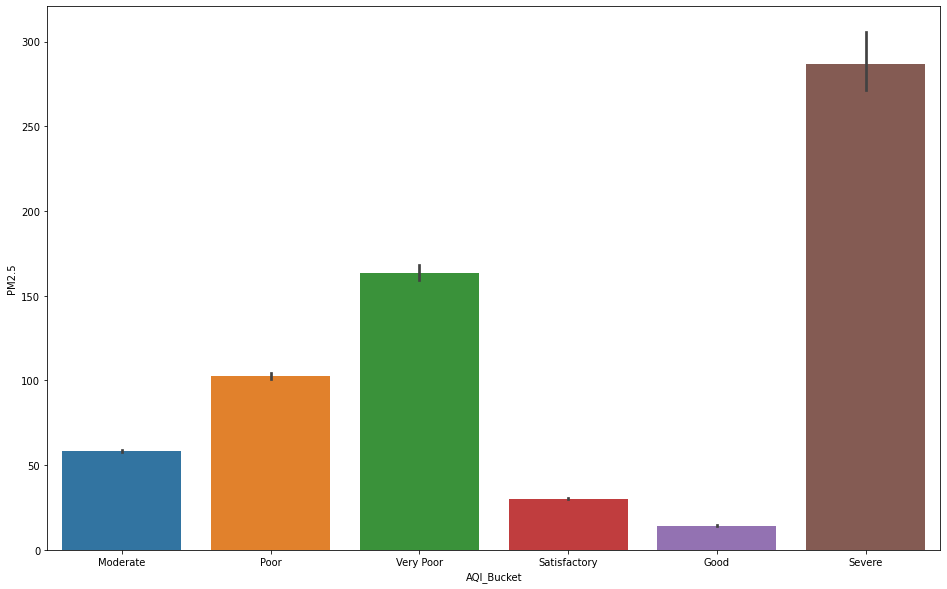

In [162]:
import matplotlib.pyplot as plt
import seaborn as s

fig,ax=plt.subplots(figsize=(16,10))
ax=s.barplot(x='AQI_Bucket',y='PM2.5', data=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

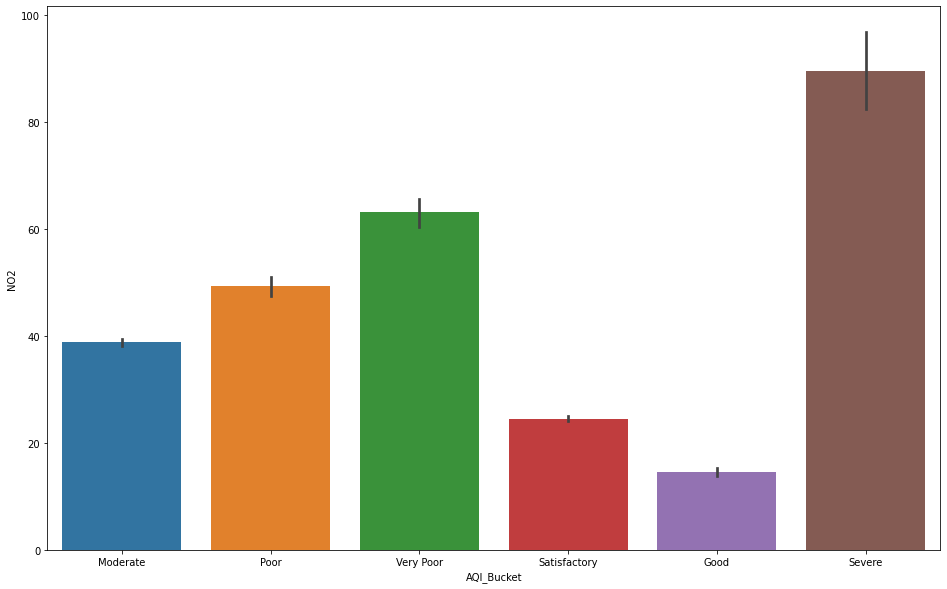

In [163]:
import matplotlib.pyplot as plt
import seaborn as s

fig,ax=plt.subplots(figsize=(16,10))
ax=s.barplot(x='AQI_Bucket',y='NO2', data=data)
plt.show

In [1]:
#Heatmap plot Diagram
#fig,ax=plt.subplots(figsize=(16,10))
#s.heatmap(data.corr(),ax=ax, annot=True)


## CHECKING AIR QUALITY INDEX USING DECISION TREE ##

In [165]:
#Importing useful libraries
import pandas as pd
#import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

airdata=pd.read_csv('station_day.csv')


New_data=data.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15]]

New_data.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
5,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


In [166]:
mydata=New_data
X=mydata.drop(columns='AQI_Bucket')
y=mydata['AQI_Bucket']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

predictions=model.predict(X_test)

A=[[y_test],[predictions]]
score=accuracy_score(y_test,predictions)

#tree.export_graphviz(model,out_file='music_recommender.dot',feature_names=['age','sex'],class_names=sorted(y.unique()),label='all',rounded=True,filled=True)
score

1.0

## DEEP LEARNING ALGORITHM FOR PREDICTING THE AIR QUALITY ##

In [167]:
#Importing useful libraries
import pandas as pd
#import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

airdata=pd.read_csv('station_day.csv')


New_data=data.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15]]

dataset=New_data

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= np.nan, strategy= 'mean')

imputer = imputer.fit(dataset.iloc[:, 0:13])
X= imputer.transform(dataset.iloc[:, 0:13])

y=list(dataset.iloc[:,13])

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder
#y1=encoder.fit_transform(y)
Y=pd.get_dummies(y)
for i in range(len(y)) :
    if(y[i]=='Very Poor'):
        y[i]=1
    elif (y[i]=='Poor'):
        y[i]=2
    elif (y[i]=='Moderate'):
        y[i]=3
    elif (y[i]=='Satisfactory'):
        y[i]=4
    elif (y[i]=='Good'):
        y[i]=5
    else:
        y[i]=6





#initializing CNN model
classifier_e25 = Sequential()
#add 1st hidden layer
classifier_e25.add(Dense(input_dim = 13, units = 13, kernel_initializer='uniform', activation='relu'))
#add output layer
classifier_e25.add(Dense(units = 13, kernel_initializer='uniform', activation='softmax'))
#compile the neural network
classifier_e25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
classifier_e25.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_19 (Dense)             (None, 13)                182       
Total params: 364
Trainable params: 364
Non-trainable params: 0
_________________________________________________________________


In [168]:
model=classifier_e25.fit(X, y, validation_split=0.33, epochs=100, batch_size=10)

Train on 6910 samples, validate on 3404 samples
Epoch 1/100
6910/6910 [==============================] - 1s 163us/sample - loss: 1.1402 - acc: 0.5401 - val_loss: 1.0592 - val_acc: 0.5076
Epoch 2/100
6910/6910 [==============================] - 1s 165us/sample - loss: 0.8598 - acc: 0.6253 - val_loss: 1.0988 - val_acc: 0.5308
Epoch 3/100
6910/6910 [==============================] - 1s 133us/sample - loss: 0.7840 - acc: 0.6677 - val_loss: 0.9924 - val_acc: 0.6266
Epoch 4/100
6910/6910 [==============================] - 1s 132us/sample - loss: 0.7170 - acc: 0.7133 - val_loss: 0.9615 - val_acc: 0.7045
Epoch 5/100
6910/6910 [==============================] - 1s 133us/sample - loss: 0.6532 - acc: 0.7499 - val_loss: 0.8814 - val_acc: 0.7115
Epoch 6/100
6910/6910 [==============================] - 1s 133us/sample - loss: 0.5945 - acc: 0.7832 - val_loss: 0.8670 - val_acc: 0.7206
Epoch 7/100
6910/6910 [==============================] - 1s 144us/sample - loss: 0.5349 - acc: 0.8127 - val_loss: 0.78

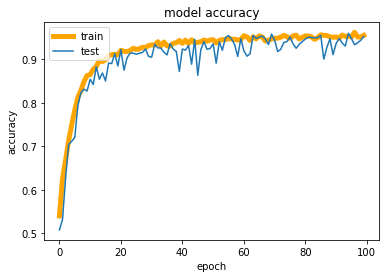

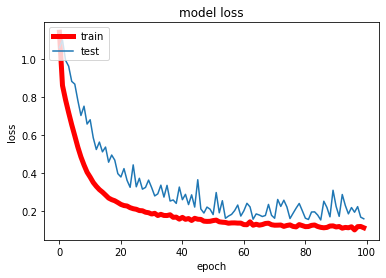

In [169]:


loss=list(model.history.values())[0]
accuracy=list(model.history.values())[1]
val_loss=list(model.history.values())[2]
val_accuracy=list(model.history.values())[3]

# summarize history for accuracy
plt.plot(accuracy,color='orange', linewidth=5)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss, color='red', linewidth=5)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Matrix Decomposition ##

In [170]:
# LU decomposition
from numpy import array
from scipy.linalg import lu
# define a square matrix
A = array([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])
print(A)
# factorize

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [171]:
P, L, U = lu(A)
print(P)
print(L)
print(U)
# reconstruct
B = P.dot(L).dot(U)
B

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[1.         0.         0.        ]
 [0.14285714 1.         0.        ]
 [0.57142857 0.5        1.        ]]
[[7.         8.         9.        ]
 [0.         0.85714286 1.71428571]
 [0.         0.         0.        ]]


array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [172]:
# QR decomposition
from numpy import array
from numpy.linalg import qr
# define rectangular matrix
A = array([
[1, 2],
[3, 4],
[5, 6]])
print(A)
# factorize
Q, R = qr(A, 'complete')
print(Q)
print(R)
# reconstruct
B = Q.dot(R)
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[-0.16903085  0.89708523  0.40824829]
 [-0.50709255  0.27602622 -0.81649658]
 [-0.84515425 -0.34503278  0.40824829]]
[[-5.91607978 -7.43735744]
 [ 0.          0.82807867]
 [ 0.          0.        ]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [173]:
# Cholesky decomposition
from numpy import array
from numpy.linalg import cholesky
# define symmetrical matrix
A = array([
[2, 1, 1],
[1, 2, 1],
[1, 1, 2]])
print(A)
# factorize
L = cholesky(A)
print(L)
# reconstruct
B = L.dot(L.T)
print(B)


[[2 1 1]
 [1 2 1]
 [1 1 2]]
[[1.41421356 0.         0.        ]
 [0.70710678 1.22474487 0.        ]
 [0.70710678 0.40824829 1.15470054]]
[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]


In [174]:
# eigendecomposition
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])
print(A)
# factorize
values, vectors = eig(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [175]:
print(values)
print(vectors)

[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


In [176]:
vectors.dot(values)

array([ -2.86098561,  -8.3696465 , -13.87830739])

In [177]:
# singular-value decomposition
from numpy import array
from scipy.linalg import svd
# define a matrix
A = array([
[1, 2],
[3, 4],
[5, 6]])
print(A)
# factorize
U, s, V = svd(A)
print(U)
print(s)
print(V)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


## Calculate Principal Component Analysis ##

In [178]:
# principal component analysis
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define matrix
A = array([
[1, 2],
[3, 4],
[5, 6]])
print(A)
# column means
M = mean(A.T, axis=1)
# center columns by subtracting column means
C = A - M
# calculate covariance matrix of centered matrix
V = cov(C.T)
# factorize covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[1 2]
 [3 4]
 [5 6]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


## Principal Component Analysis in scikit-learn

In [179]:
# principal component analysis with scikit-learn
from numpy import array
from sklearn.decomposition import PCA
# define matrix
A = array([
[1, 2],
[3, 4],
[5, 6]])
print(A)
# create the transform
pca = PCA(2)
# fit transform
pca.fit(A)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)
# transform data
B = pca.transform(A)
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]
